0.9966038515179407


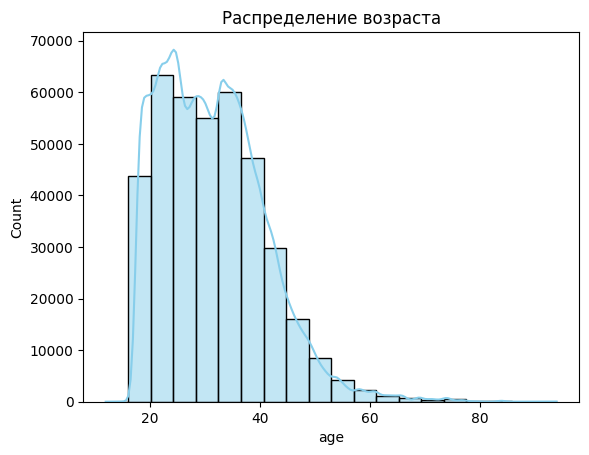

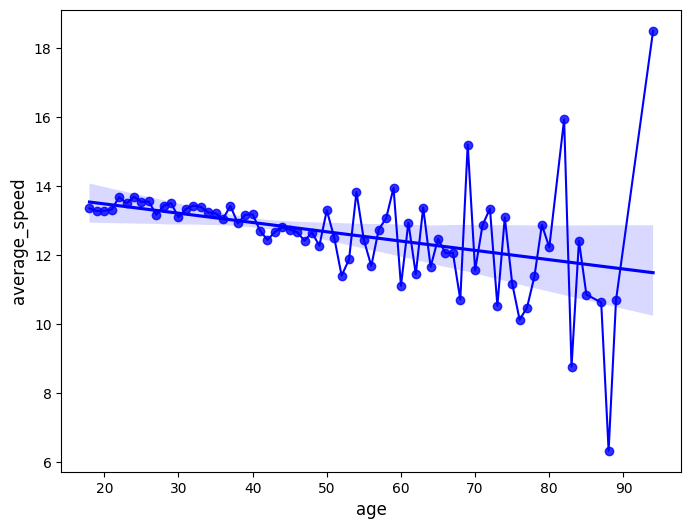

-0.0362185084389592
0.9966038515179407


: 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('kicksharing_drop.csv', index_col=0) #считываю очищенный файл
data['local_book_start_dttm'] = pd.to_datetime(data['local_book_start_dttm'])
data['book_end_dttm'] = pd.to_datetime(data['book_end_dttm'])
data['book_start_dttm'] = pd.to_datetime(data['book_start_dttm'])
data['created_dttm'] = pd.to_datetime(data['created_dttm'])
data['hour'] = pd.to_datetime(data['local_book_start_dttm']).dt.hour

data['hour'] = np.where(data['hour'] <= 20,
                                  data['hour'] + 3,      # Условие hour <= 20
                                  (data['hour'] + 3) - 23)  # Иначе

def get_day_time(hour):
    if 4 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 16:
        return 'afternoon'
    elif 17 <= hour <= 22:
        return 'evening'
    else:
        return 'night'
    
data['age_square'] = data['age'] ** 2

data['trip_number'] = data.groupby('party_rk').cumcount() + 1

# Применяем функцию к каждому значению столбца hour
data['day_time'] = data['hour'].apply(get_day_time)

# Проверка результата

data['seconds_difference'] = (data['book_start_dttm'] - data['created_dttm']).dt.total_seconds()
data = data[data['seconds_difference'] > 0]
mean = data['seconds_difference'].mean()
std = data['seconds_difference'].std()

# Вычисление Z-оценки
z_scores = (data['seconds_difference'] - mean) / std

# Условие для фильтрации (например, выбросы за пределами 3 стандартных отклонений)
data = data[np.abs(z_scores) <= 3]

ini = len(data)
uni = len(data[data['age'] <= 68])

print(uni/ini)


sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение возраста')
plt.show()
#гитограмма распределения возраста


age_grouped = data[data['age'] >= 18].groupby('age').agg({'average_speed': 'mean'}).reset_index()

# Создание графика
plt.figure(figsize=(8, 6))  # Размер графика

# Построение scatter-графика
sns.regplot(data=age_grouped, x='age', y='average_speed', color='blue')

plt.plot(age_grouped['age'], age_grouped['average_speed'], color='blue')

# Настройка фона
plt.gcf().set_facecolor('white')  # Белый фон графика

# Настройка меток осей
plt.xlabel('age', fontsize=12)
plt.ylabel('average_speed', fontsize=12)

# Показываем график
plt.show()
print(data[data['age'] >= 18]['average_speed'].corr(data[data['age'] >= 18]['age']))

data = data[data['age'] < 69]



print(len(data)/ini)

import statsmodels.api as sm

In [58]:
grouped = data.groupby('transport_model')

results = {}

for model in grouped.groups:
    group_a = grouped.get_group(model)

    results[model] = {
        'seconds_difference_mean': group_a.seconds_difference.mean(),
        'count': len(group_a.index),
        'age_mean': group_a.age.mean(),
        'age_median': group_a.age.median(),
        'transport': model,
    }

results = pd.DataFrame(results).T

results
# sns.barplot(data=results)

,seconds_difference_mean,count,age_mean,age_median,transport
B1D,4.241752,36,31.666667,29.0,B1D
E,4.880945,66725,30.345643,29.0,E
ES,4.552822,118,32.228814,31.0,ES
ES-08S,4.952058,906,30.926049,30.0,ES-08S
ES100,4.84848,2809,30.365967,29.0,ES100
ES200,4.639613,3300,30.58303,30.0,ES200
ES400,4.676728,4097,29.766903,28.0,ES400
LB,4.037787,114,33.780702,32.0,LB
Lucky,4.7885,61,30.737705,28.0,Lucky
MK,4.300753,1052,31.260456,32.0,MK


In [60]:
from scipy import stats

In [61]:
results = {}

for model in grouped.groups:
    for model2 in grouped.groups:
        if model2 == model: continue
        group_a = grouped.get_group(model)
        group_b = grouped.get_group(model2)

        skip = False
        for i in results.keys():
            if model in i.split(':') and model2 in i.split(':'):
                skip = True
                break
        if skip:
            continue
        results[f'{model}:{model2}'] = {}

        f_stat, p_value = stats.f_oneway(group_a.seconds_difference, group_b.seconds_difference)
        results[f'{model}:{model2}']['f-statistic'] = f_stat
        results[f'{model}:{model2}']['p-value'] = p_value

results = pd.DataFrame(results).T

In [ ]:
results[results['p-value'] < 0.05]

NameError: name 'results' is not defined

: 

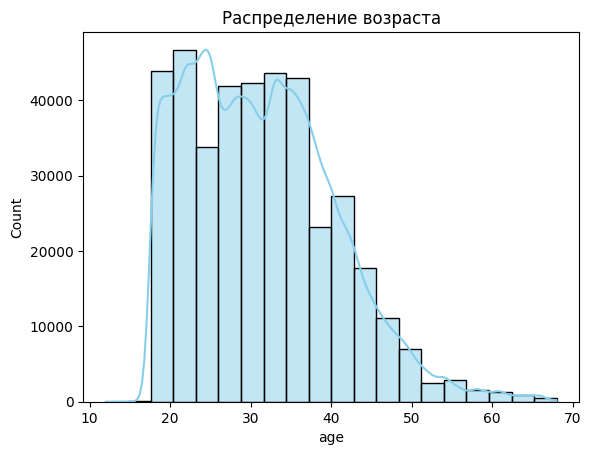

In [29]:
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение возраста')
plt.show()
#гитограмма распределения возраста

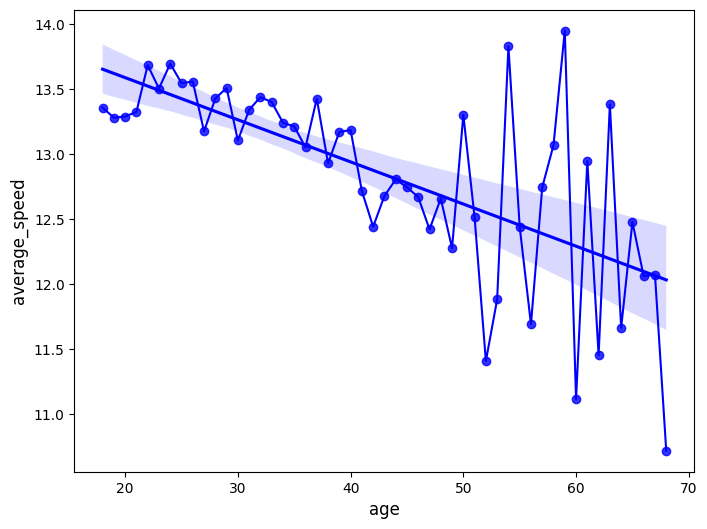

-0.03665538672739588


In [30]:
age_grouped = data[data['age'] >= 18].groupby('age').agg({'average_speed': 'mean'}).reset_index()

# Создание графика
plt.figure(figsize=(8, 6))  # Размер графика

# Построение scatter-графика
sns.regplot(data=age_grouped, x='age', y='average_speed', color='blue')

plt.plot(age_grouped['age'], age_grouped['average_speed'], color='blue')

# Настройка фона
plt.gcf().set_facecolor('white')  # Белый фон графика

# Настройка меток осей
plt.xlabel('age', fontsize=12)
plt.ylabel('average_speed', fontsize=12)

# Показываем график
plt.show()
print(data[data['age'] >= 18]['average_speed'].corr(data[data['age'] >= 18]['age']))

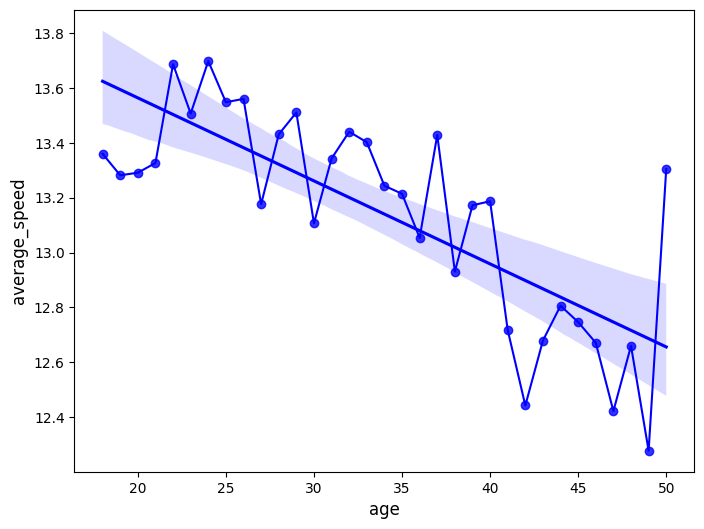

-0.03665538672739588


In [31]:
age_grouped = data[(data['age'] >= 18) & (data['age'] <= 50)].groupby('age').agg({'average_speed': 'mean'}).reset_index()

# Создание графика
plt.figure(figsize=(8, 6))  # Размер графика

# Построение scatter-графика
sns.regplot(data=age_grouped, x='age', y='average_speed', color='blue')

plt.plot(age_grouped['age'], age_grouped['average_speed'], color='blue')

# Настройка фона
plt.gcf().set_facecolor('white')  # Белый фон графика

# Настройка меток осей
plt.xlabel('age', fontsize=12)
plt.ylabel('average_speed', fontsize=12)

# Показываем график
plt.show()
print(data[data['age'] >= 18]['average_speed'].corr(data[data['age'] >= 18]['age']))

C:\Users\darak\AppData\Local\Temp\ipykernel_46920\1762957085.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['hour', 'age_group']).size().unstack(fill_value=0)


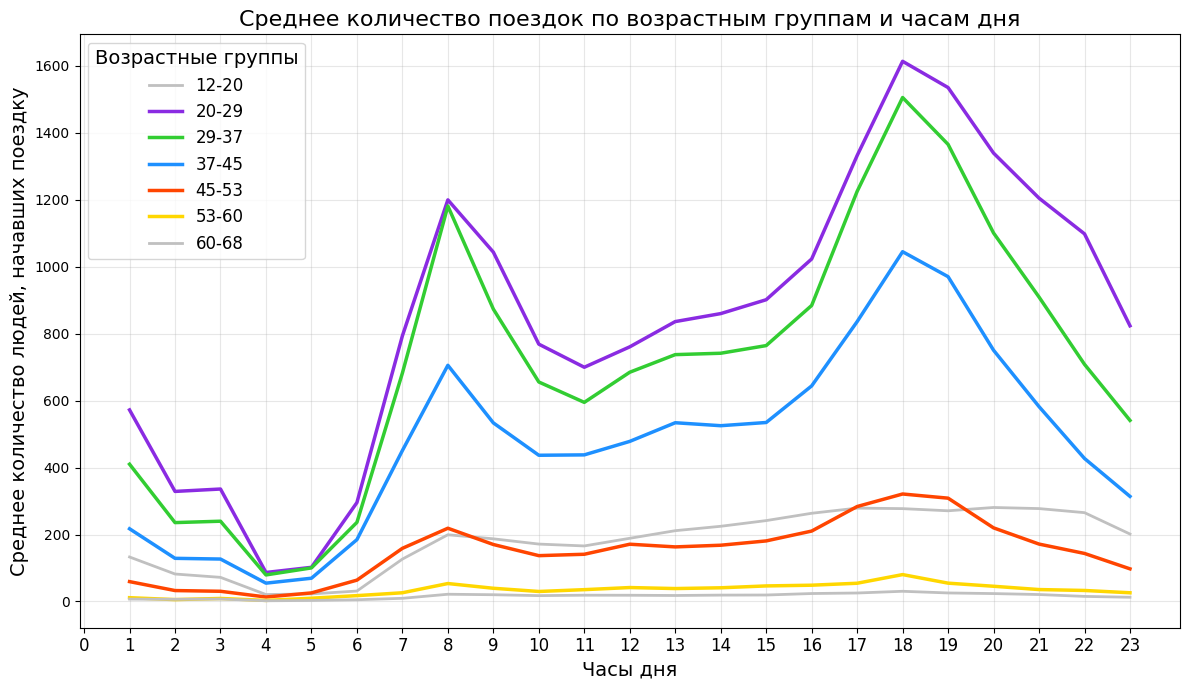

In [32]:
bins = [12, 20, 29, 37, 45, 53, 60, 68]
labels = ["12-20", "20-29", "29-37", "37-45", "45-53", "53-60", "60-68"]
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Группировка данных по часам и возрастным группам
grouped = data.groupby(['hour', 'age_group']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
# Рассчитываем среднее количество людей для каждого часа
average_per_hour = grouped / len(grouped.columns)


colors = {
    '12-20': '#C0C0C0',  # Очень светло-серый
    '60-68': '#C0C0C0',  # Очень светло-серый
    '20-29': '#8A2BE2',  # Ярко-фиолетовый (новый цвет)
    '29-37': '#32CD32',  # Ярко-зеленый
    '37-45': '#1E90FF',  # Ярко-синий
    '45-53': '#FF4500',  # Оранжево-красный (новый цвет)
    '53-60': '#FFD700',  # Золотой
}

# Цикл по возрастным группам
for column in average_per_hour.columns:
    color = colors.get(column, 'black')  # Цвет из словаря или черный по умолчанию
    linewidth = 2.5 if column not in ['12-20', '60-68'] else 2  # Тонкие линии для серых групп
    plt.plot(average_per_hour.index, average_per_hour[column], 
             label=column, linewidth=linewidth, color=color)

# Настройки графика
plt.title("Среднее количество поездок по возрастным группам и часам дня", fontsize=16)
plt.xlabel("Часы дня", fontsize=14)
plt.ylabel("Среднее количество людей, начавших поездку", fontsize=14)
plt.xticks(range(0, 24), fontsize=12)  # Метки по оси X (0-23)
plt.legend(title="Возрастные группы", fontsize=12, title_fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Показать график
plt.show()







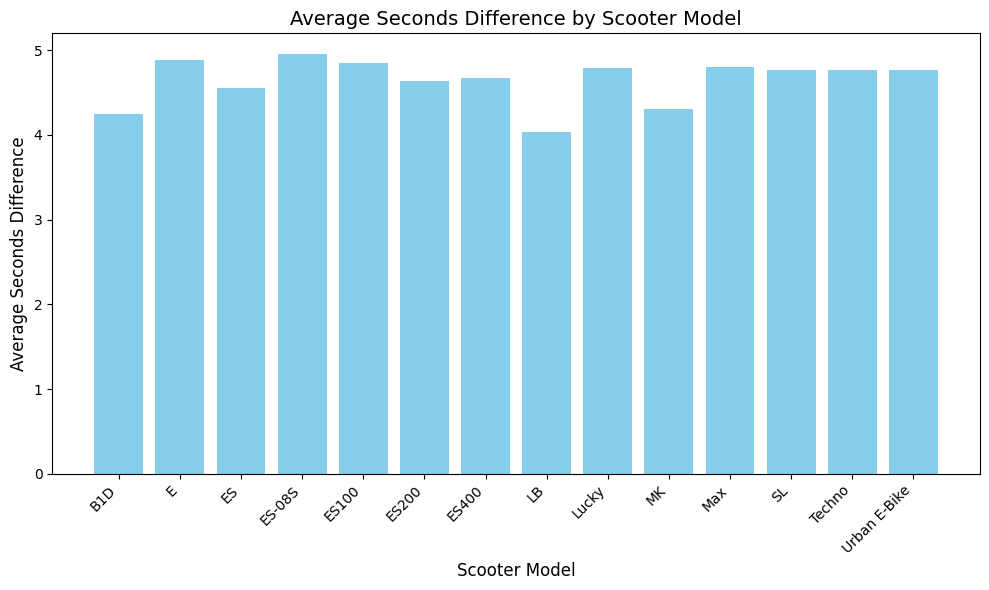

In [57]:
#Группировка данных по модели самоката и расчет среднего значения для 'seconds difference'
grouped_data = data.groupby('transport_model')['seconds_difference'].mean().reset_index()

# Переименование столбцов для удобства
grouped_data.rename(columns={'transport_model': 'Scooter Model', 'seconds_difference': 'Avg Seconds Difference'}, inplace=True)

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Scooter Model'], grouped_data['Avg Seconds Difference'], color='skyblue')
plt.xlabel('Scooter Model', fontsize=12)
plt.ylabel('Average Seconds Difference', fontsize=12)
plt.title('Average Seconds Difference by Scooter Model', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Поворот подписей на оси X для удобства
plt.tight_layout()

# Показ графика
plt.show()

In [34]:
dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data.reset_index(drop=True), dummies], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

# Вывод результатов
print(model_sm.summary())

rss = model_sm.ssr
rss

                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          4.73e-171
Time:                        21:34:24   Log-Likelihood:            -1.0079e+06
No. Observations:              385105   AIC:                         2.016e+06
Df Residuals:                  385098   BIC:                         2.016e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0029      0

np.float64(4230286.7440426)

In [39]:
dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data[data['gender_cd'] == "M"].reset_index(drop=True), dummies], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

# Вывод результатов
print(model_sm.summary())

rss1 = model_sm.ssr
rss1

                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     113.3
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.98e-143
Time:                        21:38:57   Log-Likelihood:            -8.5413e+05
No. Observations:              326385   AIC:                         1.708e+06
Df Residuals:                  326378   BIC:                         1.708e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9900      0

np.float64(3583543.4945876906)

In [38]:
dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data[data['gender_cd'] == "F"].reset_index(drop=True), dummies], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

rss2 = model_sm.ssr
print(rss2)

# Вывод результатов
print(model_sm.summary())

609521.712512707
                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     24.84
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.35e-29
Time:                        21:35:36   Log-Likelihood:            -1.4599e+05
No. Observations:               55851   AIC:                         2.920e+05
Df Residuals:                   55844   BIC:                         2.921e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              

In [ ]:
F = ((rss - rss1 - rss2)/6)/((rss1 + rss2)/(385105 - 12))

NameError: name 'rss' is not defined

In [ ]:
F

np.float64(568.3850029773441)

In [ ]:
import scipy

In [ ]:
p =  1 - scipy.stats.f.cdf(569.7, 6, 385105-12)
p

np.float64(1.1102230246251565e-16)

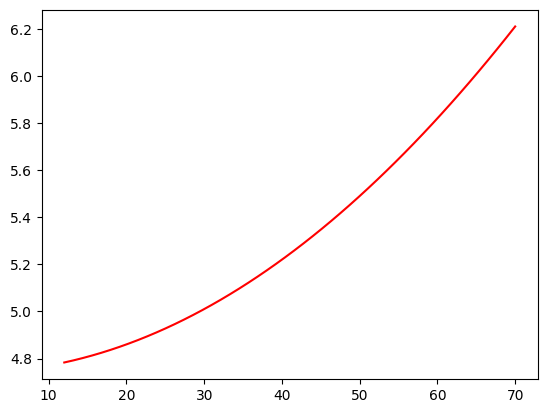

In [42]:
fig, ax = plt.subplots()
# Добавим заголовок графика
# Начало и конец изменения значения X, разбитое на 100 точек
x = np.linspace(12, 70) # X от -5 до 5
# Построение прямой
y = 0.0003 * (x**2) + 0 * x + 4.74
# Вывод графика
ax.plot(x, y, color='red')
plt.show()

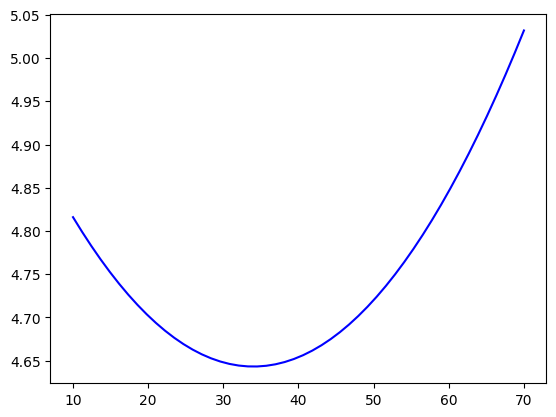

In [44]:
fig, ax = plt.subplots()
# Добавим заголовок графика
# Начало и конец изменения значения X, разбитое на 100 точек
x = np.linspace(10, 70) # X от -5 до 5
# Построение прямой
y = 0.0003 * (x**2) - 0.0204 * x + 4.99
# Вывод графика
ax.plot(x, y, color='blue')
plt.show()